# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
import pickle

In [3]:
data=pd.read_csv("spam mail.csv")
data

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.isna().sum()

Category    0
Masseges    0
dtype: int64

In [5]:
data=data.rename(columns={"Category":"Category","Masseges":"Messages"})
data

,Category,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
data.duplicated().sum()

403

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Messages  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [9]:
data.Category.unique()

array(['ham', 'spam'], dtype=object)

In [82]:
data["Category"].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

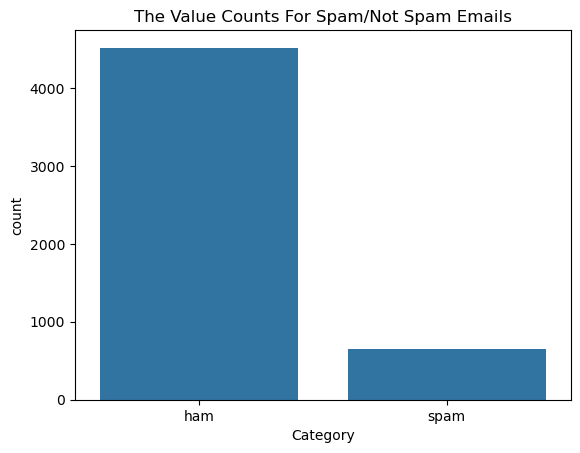

In [10]:
plt.title("The Value Counts For Spam/Not Spam Emails")
sns.countplot(data=data,x="Category")
plt.show()

In [11]:
data.Category=data.Category.apply(lambda x: 1 if x=="spam" else 0)

In [12]:
X=data["Messages"]
y=data.Category

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [15]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3463,)
X_test shape: (1706,)
y_train shape: (3463,)
y_test shape: (1706,)


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X_train_vectorized=vectorizer.fit_transform(X_train)
X_test_vectorized=vectorizer.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
model=LogisticRegression()

In [18]:
model.fit(X_train_vectorized,y_train)

LogisticRegression()

# Prediction On Training Data

In [20]:
y_train_pred=model.predict(X_train_vectorized)

In [21]:
print("Accuracy",accuracy_score(y_train,y_train_pred)),
print("Precision",precision_score(y_train,y_train_pred)),
print("Recall",recall_score(y_train,y_train_pred)),
print("F1-Score",f1_score(y_train,y_train_pred))

Accuracy 0.9974010973144672
Precision 1.0
Recall 0.9785202863961814
F1-Score 0.9891435464414958


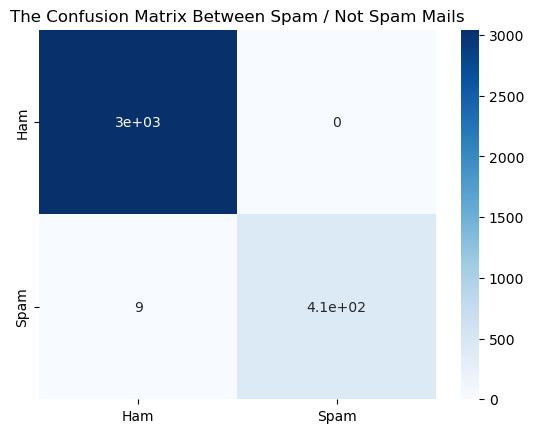

In [22]:
plt.title("The Confusion Matrix Between Spam / Not Spam Mails")
cm=confusion_matrix(y_train,y_train_pred)
sns.heatmap(data=cm,cmap="Blues",
            annot=True,
            xticklabels=["Ham","Spam"],
            yticklabels=["Ham","Spam"],
           )
plt.show()

# Prediction On Testing Data

In [24]:
y_test_pred=model.predict(X_test_vectorized)

In [25]:
print("Accuracy",accuracy_score(y_test,y_test_pred)),
print("Precision",precision_score(y_test,y_test_pred)),
print("Recall",recall_score(y_test,y_test_pred)),
print("F1-Score",f1_score(y_test,y_test_pred))

Accuracy 0.9800703399765534
Precision 0.9761904761904762
Recall 0.8760683760683761
F1-Score 0.9234234234234234


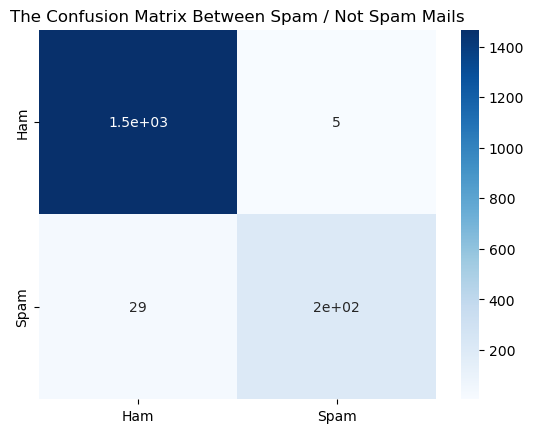

In [26]:
plt.title("The Confusion Matrix Between Spam / Not Spam Mails")
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(data=cm,cmap="Blues",
            annot=True,
            xticklabels=["Ham","Spam"],
            yticklabels=["Ham","Spam"],
           )
plt.show()

In [27]:
with open("spam_email_classifier.pkl","wb") as file:
    pickle.dump(model,file)

In [84]:
with open("vectorizer.pkl","wb") as file:
    pickle.dump(vectorizer,file)